# Image datasets and transforms
---

## Preparation

In [5]:
! wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/img.tar.gz -P ./resources/data

--2024-08-31 15:59:00--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/img.tar.gz
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50460 (49K) [application/x-tar]
Saving to: ‘./resources/data/img.tar.gz’

img.tar.gz          100%[===================>]  49.28K   313KB/s    in 0.2s    

2024-08-31 15:59:01 (313 KB/s) - ‘./resources/data/img.tar.gz’ saved [50460/50460]



In [6]:
!tar -xf ./resources/data/img.tar.gz 

In [7]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/index.csv 

--2024-08-31 16:00:00--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/index.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1680905 (1.6M) [text/csv]
Saving to: ‘index.csv’

index.csv           100%[===================>]   1.60M  1.41MB/s    in 1.1s    

2024-08-31 16:00:03 (1.41 MB/s) - ‘index.csv’ saved [1680905/1680905]



## Imports

In [31]:
# These are the libraries will be used for this lab.

import torch 
from torchvision.transforms import Compose, CenterCrop, ToTensor, RandomVerticalFlip
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
torch.manual_seed(0)

In [9]:
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
from PIL import Image
import pandas as pd
import os

## Data exploration

In [10]:
# Read CSV file from the URL and print out the first five samples
directory="."
csv_file ='index.csv'
csv_path=os.path.join(directory,csv_file)

In [11]:
data_name = pd.read_csv(csv_path)
data_name.head()

,category,image
0,Ankle boot,img/fashion0.png
1,T-shirt,img/fashion1.png
2,T-shirt,img/fashion2.png
3,Dress,img/fashion3.png
4,T-shirt,img/fashion4.png


In [17]:
# Print out the file name and the class number of the element on row 1 (the second row)

print('File name:', data_name.iloc[1, 1])
print('class:', data_name.iloc[1, 0])

File name: img/fashion1.png
class: T-shirt


In [18]:
# Combine the directory path with file name

image_name =data_name.iloc[1, 1]
image_name

'img/fashion1.png'

In [19]:
image_path=os.path.join(directory,image_name)
image_path

'./img/fashion1.png'

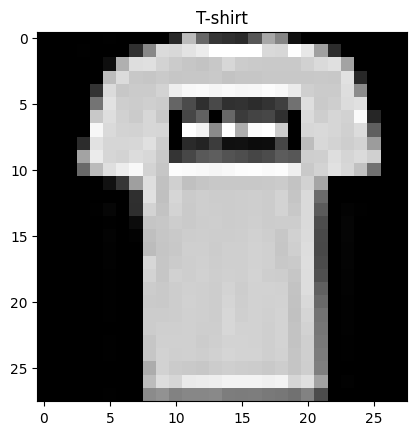

In [20]:
# Plot the second training image

image = Image.open(image_path)
plt.imshow(image,cmap='gray', vmin=0, vmax=255)
plt.title(data_name.iloc[1, 0])
plt.show()

## Dataset

In [22]:
# Create your own dataset object

class ImgDataset(Dataset):

    # Constructor
    def __init__(self, csv_file, data_dir, transform=None):
        
        # Image directory
        self.data_dir = data_dir
        
        # The transform is goint to be used on image
        self.transform = transform
        data_dir_csv_file = os.path.join(self.data_dir,csv_file)
        # Load the CSV file contians image info
        self.img_df = pd.read_csv(data_dir_csv_file)
        
        # Number of images in dataset
        self.len = self.img_df.shape[0] 
    
    # Get the length
    def __len__(self):
        return self.len
    
    # Getter
    def __getitem__(self, idx):
        
        # Image file path
        img_name = os.path.join(self.data_dir, self.img_df.iloc[idx, 1])
        # Open image file
        image = Image.open(img_name)
        
        # The class label for the image
        _class = self.img_df.iloc[idx, 0]
        
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, _class

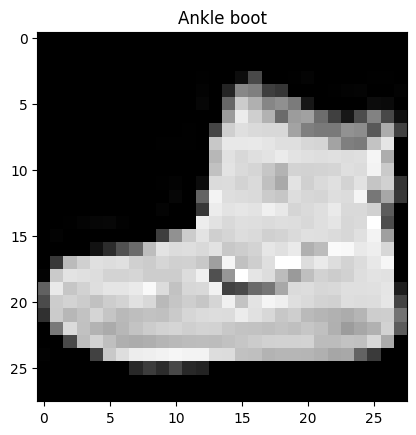

In [23]:
# Create the dataset objects

dataset = ImgDataset(csv_file=csv_file, data_dir=directory)

image, _class = dataset[0]

plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.title(_class)
plt.show()

## Transforms

In [26]:
# Combine two transforms: crop and convert to tensor. Apply the compose to MNIST dataset

img_transforms = Compose([
    CenterCrop(20),
    ToTensor()
])

dataset = ImgDataset(csv_file=csv_file , data_dir=directory, transform=img_transforms)
print("The shape of the first element tensor: ", dataset[0][0].shape)

The shape of the first element tensor:  torch.Size([1, 20, 20])


In [29]:
def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('class = ' + data_sample[1])

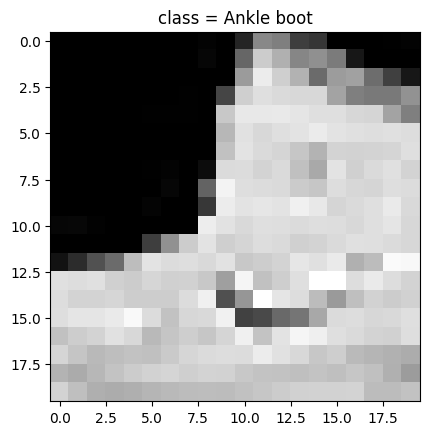

In [30]:
# Plot the first element in the dataset

show_data(dataset[0],shape = (20, 20))

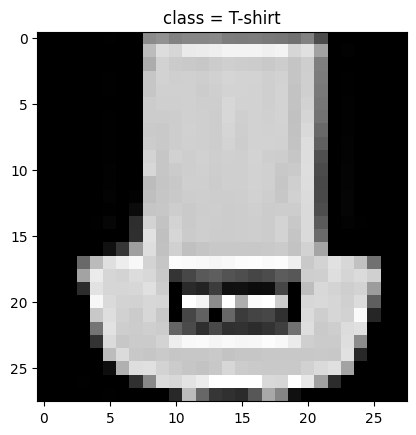

In [33]:
other_img_transforms = Compose([
    RandomVerticalFlip(p=1),
    ToTensor()
])

dataset = ImgDataset(csv_file=csv_file , data_dir=directory, transform=other_img_transforms)
show_data(dataset[1])